In [5]:
# reading from the file
import pandas as pd
import numpy as np
df = pd.read_csv("wdbc.csv")
df

Ob diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave.points_mean  \
0            0.11840           0.27760         0.30010              0.14710   
1            0.08474           0.07864         0.08690              0.07017   
2            0.10960           0.15990         0.19740              0.12790   
3            0.14250           0.28390         0.24140              0.10520   
4            0.10030           0.13280         0.19800              0.10430   
..               ...               ...             ...                  ...   
564          0.11100           0.11590         0.24390              0.13890   
565          0.09780           0.10340         0.14400              0.09791   
566          0.08455           0.10230         0.09251              0.05302   
567          0.11780           0.27700         0.35140              0.15200   
568          0.05263           0.04362         0.00000              0.00000   

     ...  radius_worst  texture_worst  perimeter_worst  area_worst  \
0    ...        25.380          17.33           184.60      2019.0   
1    ...        24.990          23.41           158.80      1956.0   
2    ...        23.570          25.53           152.50      1709.0   
3    ...        14.910          26.50            98.87       567.7   
4    ...        22.540          16.67           152.20      1575.0   
..   ...           ...            ...              ...         ...   
564  ...        25.450          26.40           166.10      2027.0   
565  ...        23.690          38.25           155.00      1731.0   
566  ...        18.980          34.12           126.70      1124.0   
567  ...        25.740          39.42           184.60      1821.0   
568  ...         9.456          30.37            59.16       268.6   

     smoothness_worst  compactness_worst  concavity_worst  \
0             0.16220            0.66560           0.7119   
1             0.12380            0.18660           0.2416   
2             0.14440            0.42450           0.4504   
3             0.20980            0.86630           0.6869   
4             0.13740            0.20500           0.4000   
..                ...                ...              ...   
564           0.14100            0.21130           0.4107   
565           0.11660            0.19220           0.3215   
566           0.11390            0.30940           0.3403   
567           0.16500            0.86810           0.9387   
568           0.08996            0.06444           0.0000   

     concave.points_worst  symmetry_worst  fractal_dimension_worst  
0                  0.2654          0.4601                  0.11890  
1                  0.1860          0.2750                  0.08902  
2                  0.2430          0.3613                  0.08758  
3                  0.2575          0.6638                  0.17300  
4                  0.1625          0.2364                  0.07678  
..                    ...             ...                      ...  
564                0.2216       

数据集的特征为活检样本图片中细胞核各个特征的均值，标准差，最大值。
半径r = 中心到边界距离的平均值，恶性大小形态不一致，普遍比良性大   


In [9]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import seaborn as sns
import matplotlib.pyplot as plt
features = df.columns.values.tolist()
features = features[2:32]
features

['radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave.points_mean',
 'symmetry_mean',
 'fractal_dimension_mean',
 'radius_se',
 'texture_se',
 'perimeter_se',
 'area_se',
 'smoothness_se',
 'compactness_se',
 'concavity_se',
 'concave.points_se',
 'symmetry_se',
 'fractal_dimension_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave.points_worst',
 'symmetry_worst',
 'fractal_dimension_worst']

## Single feature analysis

In [7]:
#single feature analysis
def analyse(dataset, feature_name, label_name, labels):
    %config InlineBackend.figure_format = 'svg'
    kinds = ['_mean', '_se', '_worst']
    f, axes = plt.subplots(2, 6, figsize = (21, 5), sharex=False)
    plt.subplots_adjust(wspace =0.3, hspace =0.3)#Adjust subgraph spacing
    for i in range(3):
        feature_name_new =feature_name + kinds[i]
        sns.kdeplot(dataset[feature_name_new], color='black', shade=True, 
                    label=feature_name_new, ax = axes[0, 2*i])
        sns.kdeplot(dataset[dataset[label_name] == labels[0]][feature_name_new], color='r', 
                    shade=True, label=labels[0], ax = axes[0, 1 + 2*i])
        sns.kdeplot(dataset[dataset[label_name] == labels[1]][feature_name_new], color='g', 
                    shade=True, label=labels[1], ax = axes[0, 1 + 2*i])
        sns.violinplot(x=label_name, y=feature_name_new, data=dataset, ax=axes[1, 2*i])
        sns.boxplot(x=label_name, y=feature_name_new, data=dataset, ax=axes[1, 1+ 2*i])
    file_name = feature_name+".png"
    plt.savefig(file_name)
    

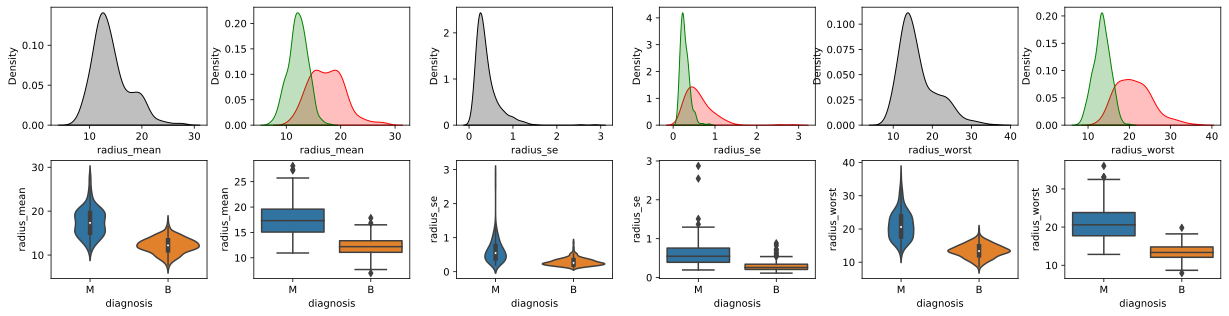

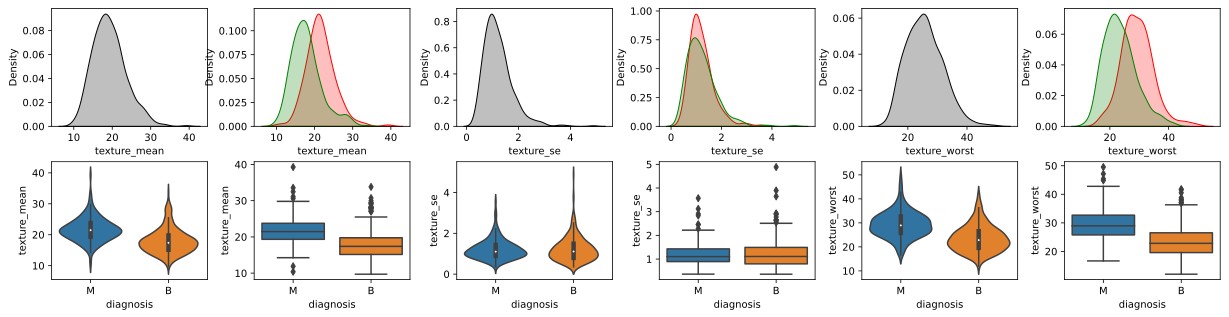

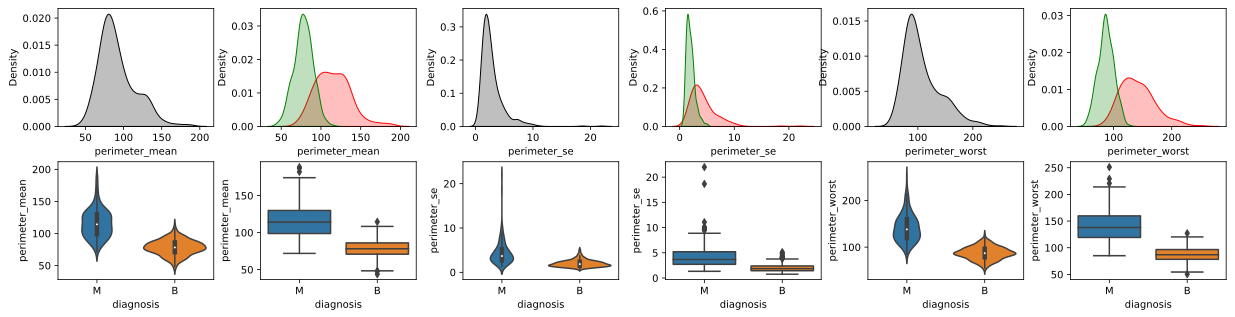

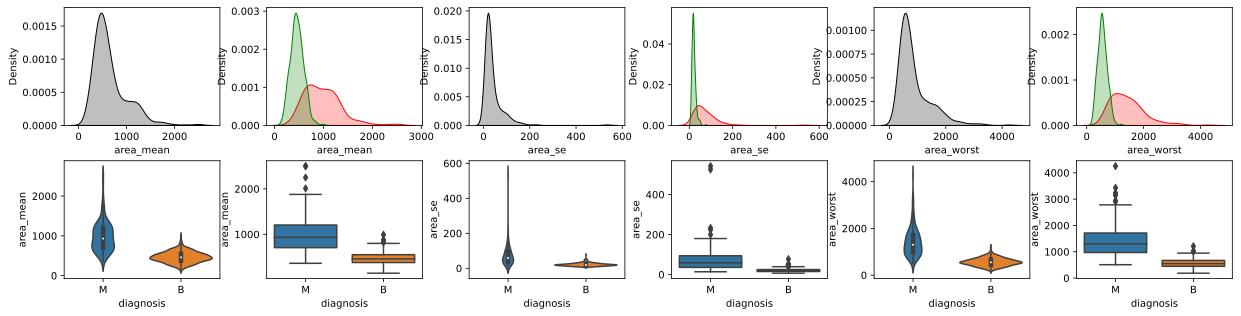

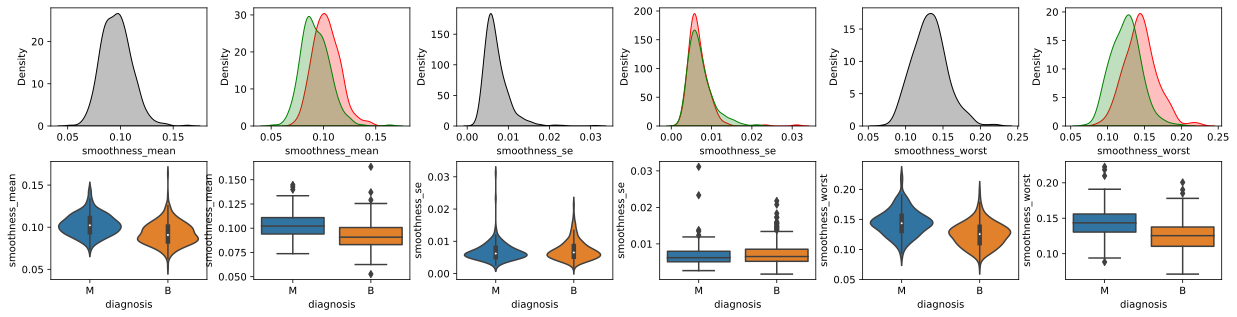

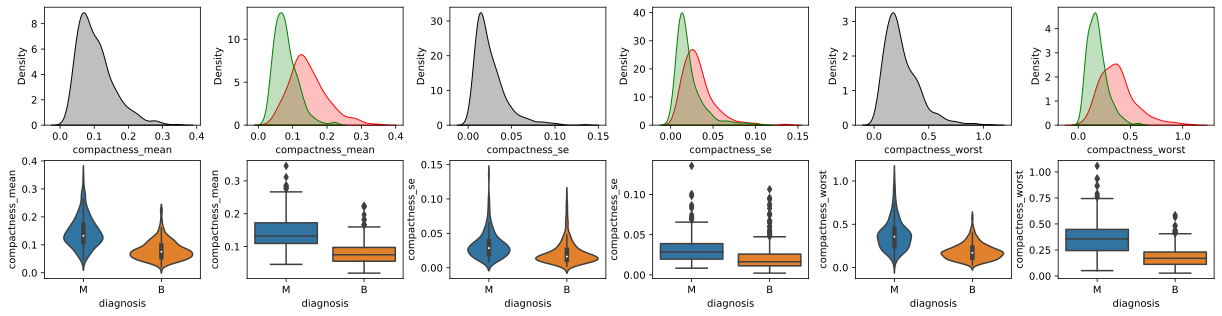

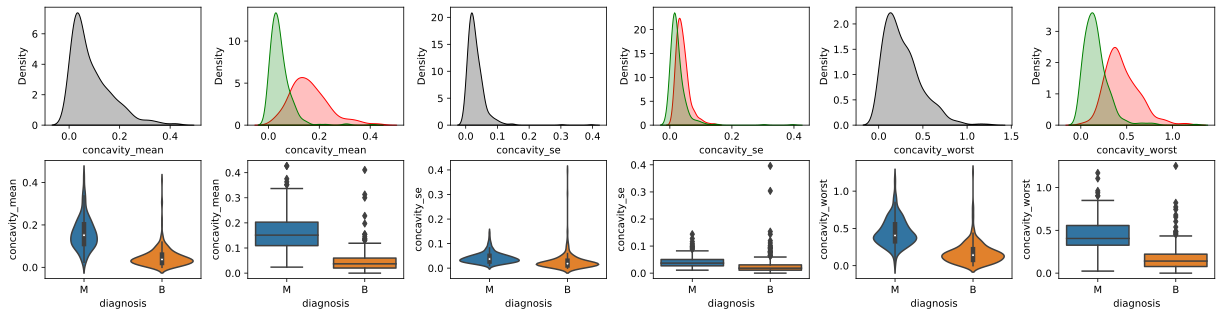

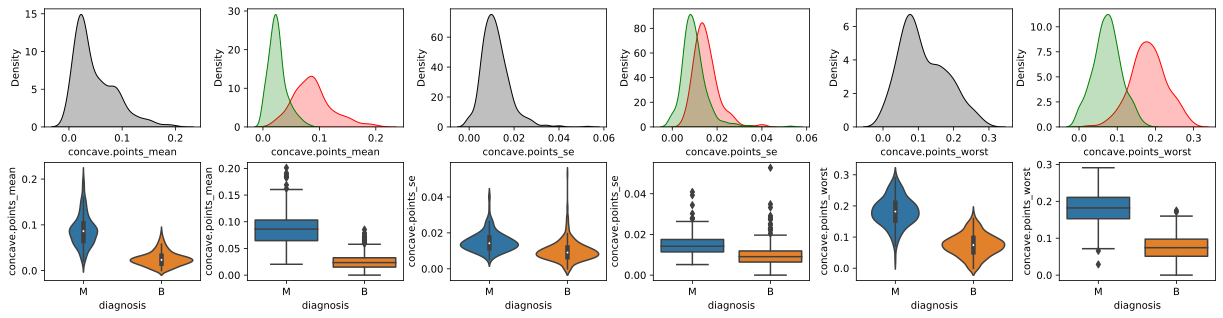

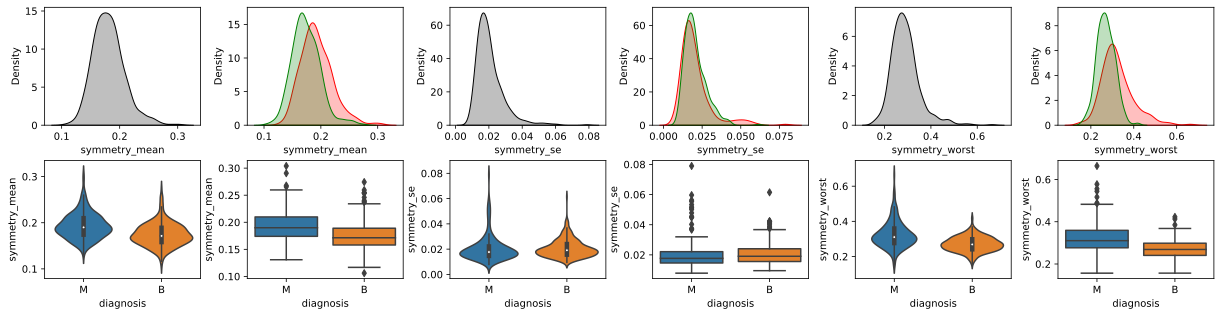

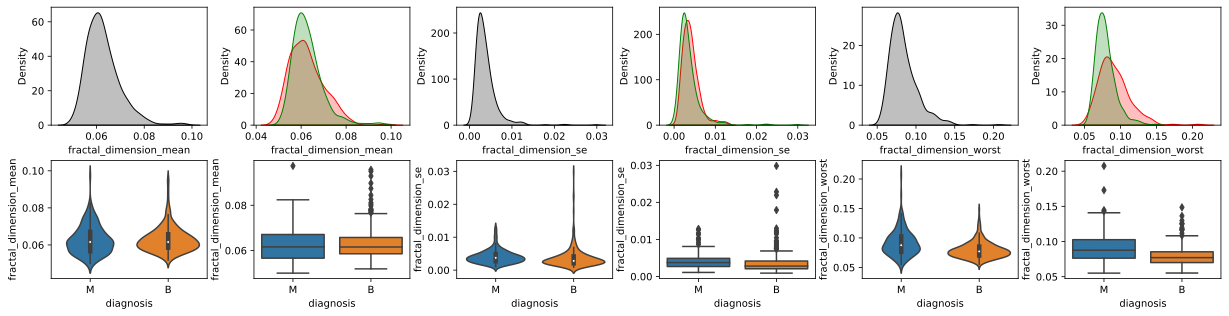

In [10]:
dataset_labels = ['M', 'B']
#Slice the list, remove the label and ID, remove_ Suffix such as _mean
features = features[0:10]
for i in range(len(features)-1):
    arr = features[i].split('_')
    features[i] = arr[0]
features[9]= "fractal_dimension"   
# Analyze the distribution of each feature in different categories
for feature in features:
    analyse(df, feature, 
            'diagnosis', dataset_labels)

1.半径衡量细胞核大小的直接方式能够较为有效地划分数据集。两类样本均存在大量异常值，均不适合归一化，适合做标准化处理。
2.纹理-诊断重要依据，混合高斯分布，均值和最大值有一定区分度。
3.周长与面积：恶性大于良性
4.平滑度（似圆度）是最重要的形态特征之一，边缘越平滑，半径长度的局部变化越小，良性可能性越大。
   平滑度表达为半径长度的局部变化，即特征值越大，似圆度越低，“粗糙度”
   呈混合高斯分布，恶性粗糙，特征值较大，但特征值取值相对集中，且类间重叠度很大，可分性弱。
5. 凹点：出现在核边界上的凹痕数量
   混合高斯分布，恶性凹点数量普遍较多
6. 凹度：代表细胞核轮廓凹部严重程度（凹度和凹点双变量分析，线性相关，正相关）
   混合高斯分布
7. 对称性：恶性：不对称，异型性
   混合高斯分布，区分性差
8. 分型维数：描述一个分形对空间填充程度统计量。反映一个图形的形状特征。
   混合高斯分布，可分性差
9. pairplot前十个特征之间的关系
   

## Bivariate feature analysis

0.9978552814938111


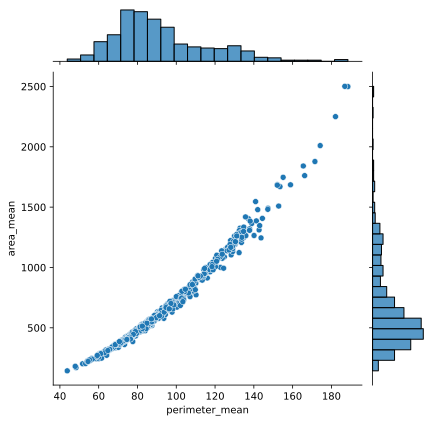

In [11]:
#Bivariate analysis   面积和周长
from scipy.stats import pearsonr
import seaborn as sns
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'svg'
sns.jointplot(x='perimeter_mean', y='area_mean', 
              data=df)
plt.plot()
X = np.array(df)
dataset_target = X[:, 1]
dataset_data = X[:, 2:32]
pear, p_value = pearsonr(dataset_data[:,0], dataset_data[:,2])
print(pear)
plt.savefig('pa.png')

0.9978552814938111


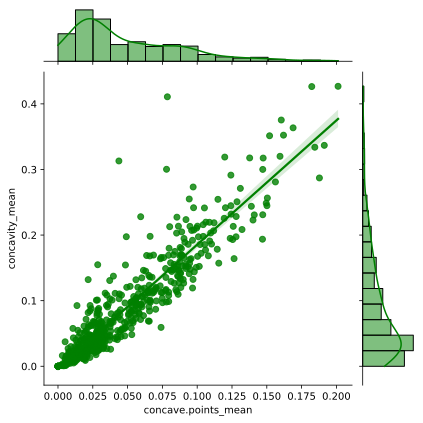

In [12]:
#Bivariate analysis   面积和周长
%config InlineBackend.figure_format = 'svg'
sns.jointplot(x='concave.points_mean', 
              y='concavity_mean', 
              data=df,
              kind='reg',
              color = 'green')
plt.plot()
X = np.array(df)
dataset_target = X[:, 1]
dataset_data = X[:, 2:32]
pear, p_value = pearsonr(dataset_data[:,0], dataset_data[:,2])
print(pear)
plt.savefig('concave.png')

使用双变量分布jointplot，展示周长与面积的均值之间的关系。可以看出，双变量分析中，样本的坐标点大致在一条二次函数曲线上，但不是严格分布在某条曲线上，这也验证了肿瘤细胞核间存在似圆度的差异，所以周长和面积需要座位独立的特征。皮尔森相关系数


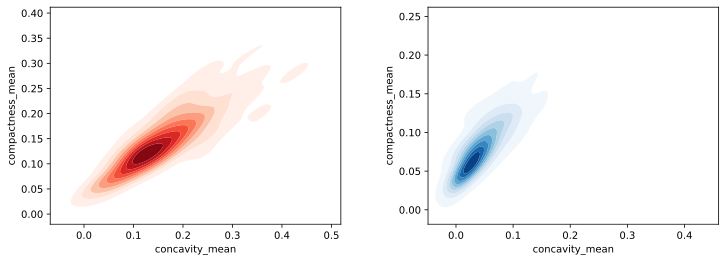

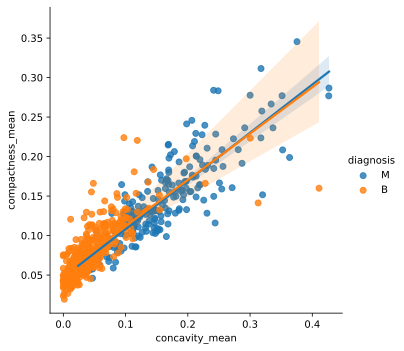

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'svg'
f,axes = plt.subplots(1, 2, figsize = (12,4), sharex=False)
plt.subplots_adjust(wspace =0.3, hspace =0.3)

diagnosis_M = df.query("diagnosis == 'M'")
diagnosis_B = df.query("diagnosis == 'B'")
sns.kdeplot(x= diagnosis_M['concavity_mean'], y=diagnosis_M['compactness_mean'], 
            cmap='Reds', shade = True, thresh = 0.05, ax=axes[0])
sns.kdeplot(x=diagnosis_B['concavity_mean'], y=diagnosis_B['compactness_mean'], 
            cmap='Blues', shade = True, thresh = 0.05, ax=axes[1])

sns.lmplot(x='concavity_mean', y='compactness_mean', data=df, 
           fit_reg=True, hue='diagnosis')

In [14]:
#Tag digitization
from sklearn import preprocessing
encoder = preprocessing.LabelEncoder().fit(df['diagnosis'])
df['diagnosis'] = encoder.transform(df['diagnosis'])
print('Number of tags: %s' % encoder.classes_)
print('Label value standardization: %s' % encoder.transform(['B', 'M']))

Number of tags: ['B' 'M']
Label value standardization: [0 1]


In [15]:
from sklearn.model_selection import train_test_split
import numpy as np
np.random.seed(3354354524)
#split the data into 80% training, 20% testing
train, test = train_test_split(df, test_size = 0.2,train_size = 0.8)
train=train.dropna()
test=test.dropna()
x_train = train.iloc[:,2:len(df.columns)]
x_test = test.iloc[:,2:len(df.columns)]
y_train = train.iloc[:,1]
y_test = test.iloc[:,1]

## (a). **Logistic Regression**

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings("ignore")

model1 = LogisticRegression()
model1.fit(x_train, y_train)
cv_score_train = cross_val_score(model1, x_train, y_train, cv=10).mean()
# accuracy rate
cv_score_train

0.9428502415458938

In [8]:
# confusion matrix
preds_test = model1.predict(x_test)
from sklearn.metrics import confusion_matrix
# confusion_matrix of train data and test data
confusion_matrix(preds_test, y_test)

array([[66,  3],
       [ 1, 44]], dtype=int64)

*The accuracy is 0.9385024154589372*

## (b). **KNN**

## (c). **Neural Networks**

In [9]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
df = df.iloc[:,1:len(df.columns)]
le = LabelEncoder()
# split x and y.
y = le.fit_transform(df["diagnosis"])
x = df.iloc[:,1:len(df.columns)].to_numpy()
x = np.array(x, dtype = np.float32)

In [10]:
# train-test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

In [11]:
x_train[:4] # first 4 rows of predictor data

array([[1.147e+01, 1.603e+01, 7.302e+01, 4.027e+02, 9.076e-02, 5.886e-02,
        2.587e-02, 2.322e-02, 1.634e-01, 6.372e-02, 1.707e-01, 7.615e-01,
        1.090e+00, 1.225e+01, 9.191e-03, 8.548e-03, 9.400e-03, 6.315e-03,
        1.755e-02, 3.009e-03, 1.251e+01, 2.079e+01, 7.967e+01, 4.758e+02,
        1.531e-01, 1.120e-01, 9.823e-02, 6.548e-02, 2.851e-01, 8.763e-02],
       [1.065e+01, 2.522e+01, 6.801e+01, 3.470e+02, 9.657e-02, 7.234e-02,
        2.379e-02, 1.615e-02, 1.897e-01, 6.329e-02, 2.497e-01, 1.493e+00,
        1.497e+00, 1.664e+01, 7.189e-03, 1.035e-02, 1.081e-02, 6.245e-03,
        2.158e-02, 2.619e-03, 1.225e+01, 3.519e+01, 7.798e+01, 4.557e+02,
        1.499e-01, 1.398e-01, 1.125e-01, 6.136e-02, 3.409e-01, 8.147e-02],
       [1.276e+01, 1.337e+01, 8.229e+01, 5.041e+02, 8.794e-02, 7.948e-02,
        4.052e-02, 2.548e-02, 1.601e-01, 6.140e-02, 3.265e-01, 6.594e-01,
        2.346e+00, 2.518e+01, 6.494e-03, 2.768e-02, 3.137e-02, 1.069e-02,
        1.731e-02, 4.392e-03, 1.419e

In [13]:
y_train[:4] # first 4 rows of target data

array([0, 0, 0, 1])

In [14]:
import tensorflow as tf
from tensorflow.keras import layers
# Let's do two "hidden" layers of 100 units each
model = tf.keras.models.Sequential([
    layers.Dense(100, input_shape = (30,), activation='relu'),
    layers.Dense(100, activation='relu'),
    layers.Dense(30)
])

In [15]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 100)               3100      
_________________________________________________________________
dense_4 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_5 (Dense)              (None, 30)                3030      
Total params: 16,230
Trainable params: 16,230
Non-trainable params: 0
_________________________________________________________________


In [127]:
model(x_train[:4])

<tf.Tensor: shape=(4, 30), dtype=float32, numpy=
array([[ 2.37045174e+01, -1.07455956e+02, -6.49071045e+01,
         1.76122114e-01,  7.93225327e+01,  8.13565063e+01,
        -2.76534042e+01,  6.29675980e+01, -1.10617996e+02,
        -4.87198410e+01,  8.03000870e+01, -6.31032486e+01,
         1.30120041e+02,  1.03833130e+02, -3.21095734e+01,
        -4.61331892e+00,  5.72098351e+01, -3.18096485e+01,
         4.79541384e-02, -2.98622608e+01,  9.85026360e+00,
         2.36128826e+01,  8.23623562e+00,  3.55933189e+01,
        -3.52145348e+01,  4.79057198e+01,  1.64918564e+02,
        -9.18777237e+01,  1.34708595e+01, -2.47103024e+01],
       [ 2.16806660e+01, -9.32766037e+01, -5.78659706e+01,
         5.19438505e-01,  7.36994171e+01,  7.51693573e+01,
        -2.62454128e+01,  5.78530388e+01, -1.02693283e+02,
        -4.45699425e+01,  7.52932053e+01, -5.69689789e+01,
         1.18590706e+02,  9.52192459e+01, -3.35646172e+01,
        -2.18395090e+00,  5.38190918e+01, -2.82299805e+01,
      

In [16]:
# convert into probabilities
softmax = tf.keras.layers.Softmax()
softmax(model(x_train[:5]))

<tf.Tensor: shape=(5, 30), dtype=float32, numpy=
array([[3.38114597e-26, 0.00000000e+00, 4.42872802e-03, 3.55946530e-18,
        2.47807391e-02, 5.14938268e-33, 0.00000000e+00, 5.81525703e-19,
        0.00000000e+00, 5.03631812e-33, 9.34827489e-15, 3.10150595e-19,
        9.70776737e-01, 1.49582042e-25, 1.37727166e-05, 6.36548952e-31,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        1.27954225e-30, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.43279894e-25, 3.74269788e-13, 0.00000000e+00,
        1.03578135e-09, 0.00000000e+00],
       [1.03882268e-23, 3.99627722e-37, 1.03220139e-02, 8.86966022e-19,
        1.55098867e-04, 5.93436914e-29, 0.00000000e+00, 3.78350592e-18,
        1.84363346e-38, 4.26135099e-32, 1.82295626e-13, 2.72152100e-18,
        9.89521384e-01, 2.27085034e-23, 1.58236219e-06, 5.66055367e-32,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        1.46552285e-30, 0.00000000e+00, 0.0000

In [17]:
# ready for training!
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
model.compile(optimizer = "adam",
              loss = loss_fn,
              metrics = ["accuracy"])
# train them 100 times.
history = model.fit(x_train, y_train, epochs = 100, verbose=1)

Epoch 1/100
13/13 [==============================] - 0s 2ms/step - loss: 28.8554 - accuracy: 0.3844 
Epoch 2/100
13/13 [==============================] - 0s 2ms/step - loss: 0.7057 - accuracy: 0.8693
Epoch 3/100
13/13 [==============================] - 0s 2ms/step - loss: 0.4630 - accuracy: 0.9070
Epoch 4/100
13/13 [==============================] - 0s 2ms/step - loss: 0.4197 - accuracy: 0.9070
Epoch 5/100
13/13 [==============================] - 0s 2ms/step - loss: 0.4039 - accuracy: 0.8970
Epoch 6/100
13/13 [==============================] - 0s 2ms/step - loss: 0.3839 - accuracy: 0.9070
Epoch 7/100
13/13 [==============================] - 0s 2ms/step - loss: 0.4885 - accuracy: 0.8794
Epoch 8/100
13/13 [==============================] - 0s 2ms/step - loss: 0.3949 - accuracy: 0.8945
Epoch 9/100
13/13 [==============================] - 0s 2ms/step - loss: 0.3562 - accuracy: 0.8995
Epoch 10/100
13/13 [==============================] - 0s 2ms/step - loss: 0.3371 - accuracy: 0.9146
Epoch 1

Epoch 83/100
13/13 [==============================] - 0s 2ms/step - loss: 0.3146 - accuracy: 0.9296
Epoch 84/100
13/13 [==============================] - 0s 2ms/step - loss: 0.2851 - accuracy: 0.9296
Epoch 85/100
13/13 [==============================] - 0s 2ms/step - loss: 0.5408 - accuracy: 0.8819
Epoch 86/100
13/13 [==============================] - 0s 2ms/step - loss: 0.2367 - accuracy: 0.9422
Epoch 87/100
13/13 [==============================] - 0s 2ms/step - loss: 0.3313 - accuracy: 0.9221
Epoch 88/100
13/13 [==============================] - 0s 2ms/step - loss: 0.2552 - accuracy: 0.9397
Epoch 89/100
13/13 [==============================] - 0s 2ms/step - loss: 0.3254 - accuracy: 0.9271
Epoch 90/100
13/13 [==============================] - 0s 2ms/step - loss: 0.3549 - accuracy: 0.9070
Epoch 91/100
13/13 [==============================] - 0s 2ms/step - loss: 0.2992 - accuracy: 0.9296
Epoch 92/100
13/13 [==============================] - 0s 2ms/step - loss: 0.3963 - accuracy: 0.9146


[Text(0.5, 0, 'epoch'), Text(0, 0.5, 'training accuracy')]

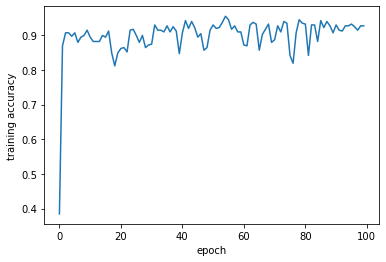

In [18]:
# plot the progress of the training over time:
plt.plot(history.history["accuracy"])
plt.gca().set(xlabel = "epoch", ylabel = "training accuracy")

In [19]:
model.evaluate(x_test, y_test, verbose = 2)

6/6 - 0s - loss: 0.5797 - accuracy: 0.9064


[0.5796910524368286, 0.9064327478408813]

*The accuracy is 0.9122806787490845*